In [2]:
your_local_path='C:/Users/Thinkpad/Desktop/ML/PCA/'

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1200)
pd.set_option('max_columns',50)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import time
import random
from sklearn.ensemble import RandomForestClassifier


In [4]:
student_data_mat   = pd.read_csv(your_local_path+"student-mat.csv",delimiter=";")
student_data_mat
student_data_por   = pd.read_csv(your_local_path+"student-por.csv",delimiter=";")
student_data_por
student_data = pd.merge(student_data_mat,student_data_por,how="outer")
student_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
student_data.dtypes
student_data.info
student_data.describe()
student_data.dtypes==object
col_str = student_data.columns[student_data.dtypes == object]

In [6]:
student_data = pd.get_dummies(student_data, columns = col_str, drop_first = True)
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 42 columns):
age                  1044 non-null int64
Medu                 1044 non-null int64
Fedu                 1044 non-null int64
traveltime           1044 non-null int64
studytime            1044 non-null int64
failures             1044 non-null int64
famrel               1044 non-null int64
freetime             1044 non-null int64
goout                1044 non-null int64
Dalc                 1044 non-null int64
Walc                 1044 non-null int64
health               1044 non-null int64
absences             1044 non-null int64
G1                   1044 non-null int64
G2                   1044 non-null int64
G3                   1044 non-null int64
school_MS            1044 non-null uint8
sex_M                1044 non-null uint8
address_U            1044 non-null uint8
famsize_LE3          1044 non-null uint8
Pstatus_T            1044 non-null uint8
Mjob_health          1044 non-nu

In [7]:
student_data.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


In [8]:
print(student_data[["G1","G2","G3"]].corr())

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [9]:
 # Since, G1,G2,G3 have very high correlation, we can drop G1,G2
student_data.drop(axis = 1,labels= ["G1","G2"])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,1,1,1,0
6,16,2,2,1,2,0,4,4,4,1,1,3,0,11,0,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0
8,15,3,2,1,2,0,4,2,2,1,1,1,0,19,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,1,5,0,15,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0


In [10]:
label = student_data["G3"].values
predictors = student_data.drop(axis = 1,labels= ["G3"]).values
predictors

array([[18,  4,  4, ...,  1,  0,  0],
       [17,  1,  1, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  1,  0],
       ...,
       [18,  1,  1, ...,  1,  0,  0],
       [17,  3,  1, ...,  1,  1,  0],
       [18,  3,  2, ...,  1,  1,  0]], dtype=int64)

In [11]:
# Let's train a LogisticRegression model on 41 variables and record the time taken to train before applying PCA
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=5)
start=time.time()
clf.fit(predictors,label,random.seed(1))
end=time.time()
training_time_before_pca=end-start
print("Time taken to train the model with all the variables is {}.".format(training_time_before_pca))

C:\Users\Thinkpad\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Time taken to train the model with all the variables is 23.824564695358276.


In [12]:
pca = PCA(n_components=len(student_data.columns)-1)
pca.fit(predictors)
variance_ratio = pca.explained_variance_ratio_

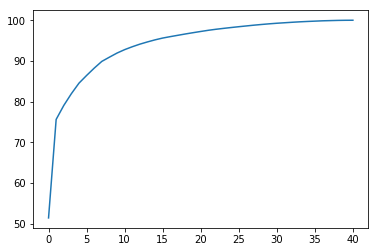

In [13]:
#variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(variance_ratio_cum_sum)
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100))

In [14]:
#Looking at above plot more than 90% variance is explained by 10 variables
pca = PCA(n_components=10)
pca.fit(predictors)
Transformed_vector =pca.fit_transform(predictors)
print(Transformed_vector)

[[ 2.55386268e+00  7.47453817e+00 -1.14120254e+00 ... -8.18840004e-01
   6.82048164e-01  1.84069223e-01]
 [ 5.78881858e-01  8.75537169e+00 -2.22048996e+00 ... -1.17979011e+00
   4.16662049e-01 -7.82214032e-01]
 [ 6.14374965e+00  4.69979495e+00 -1.04470898e+00 ...  1.52466002e-03
  -5.46980864e-01 -2.48531037e-01]
 ...
 [ 1.45167665e+00 -4.53844247e-01 -2.42839137e+00 ...  2.41654047e+00
   5.49882462e-01  2.05866210e+00]
 [ 1.90452810e+00  1.76341466e+00  2.17160414e+00 ...  5.41607271e-01
  -2.45949802e-01  1.31251997e+00]
 [-2.16704599e-01  1.26199418e+00  1.69342344e+00 ...  1.35172417e+00
  -2.49675973e+00 -5.66116252e-01]]


In [15]:
clf1=LogisticRegressionCV(cv=5)
start=time.time()
clf1.fit(Transformed_vector,label)
end=time.time()
training_time_after_pca =end - start
print("Time taken to train the log reg model with 10 components is {}.".format(training_time_after_pca))

C:\Users\Thinkpad\Anaconda3.1\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Time taken to train the log reg model with 10 components is 5.840061902999878.


In [16]:
rfClassifier=RandomForestClassifier(max_depth = 10, min_samples_split=5, n_estimators = 50, random_state = 1)
start=time.time()
rfClassifier.fit(Transformed_vector,label)
end=time.time()
training_time_after_pca =end - start
print("Time taken to train the RF model with 10 components is {}.".format(training_time_after_pca))

Time taken to train the RF model with 10 components is 0.2930126190185547.


In [17]:
print('training time before pca' +': '+str(training_time_before_pca))
print('training time after pca'+': '+ str(training_time_after_pca))

training time before pca: 23.824564695358276
training time after pca: 0.2930126190185547


we can conclude that the computational time is reduced by several times after applying pca and selecting 10 principal components, And the variables are transformed to a new set of linearly uncorrelated variables